In [ ]:
import pandas as pd
from pathlib import Path
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt

In [ ]:
PROJPATH = Path().resolve().parent
breakupdata = PROJPATH / "data/breakupdata/derived"
stationdata = PROJPATH / "data/weatherstations/ACIS/TDD/tdd_climatologies"

In [ ]:
stations_tddclim = stationdata.glob("*.csv")
stations_tddclim_list = list(stations_tddclim)

## Prototyping

In [ ]:
testdata = pd.read_csv(stations_tddclim_list[3], skiprows=4, index_col=0)
testdata

,Tavg_F,tdd
d_since_march1,,
0,7.33,0.00
1,4.54,0.00
2,5.13,0.00
3,6.68,0.00
4,8.46,0.00
...,...,...
117,61.28,29.28
118,60.83,28.83
119,60.87,28.87


In [ ]:
stationname = stations_tddclim_list[3].stem[:-14]
testdf = pd.DataFrame(testdata['tdd'].cumsum())
testdf.columns = [stationname]
testdf

,COLLEGE_OBSERVATORY
d_since_march1,
0,0.00
1,0.00
2,0.00
3,0.00
4,0.00
...,...
117,925.74
118,949.08
119,971.67


<AxesSubplot: xlabel='d_since_march1', ylabel='COLLEGE_OBSERVATORY'>

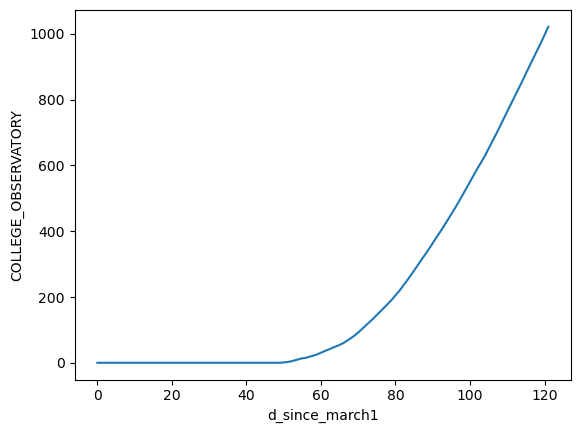

In [ ]:
sb.lineplot(data=testdf[stationname])

### Loop

In [ ]:
alltdd = []
for fpth in stations_tddclim_list:
    stationname = fpth.stem[:-14]
    testdata = pd.read_csv(fpth, skiprows=4, index_col=0)
    testdf = pd.DataFrame(testdata['tdd'].cumsum())
    testdf.columns = [stationname]
    alltdd.append(testdf)

Text(0, 0.5, 'Thawing degree days (F)')

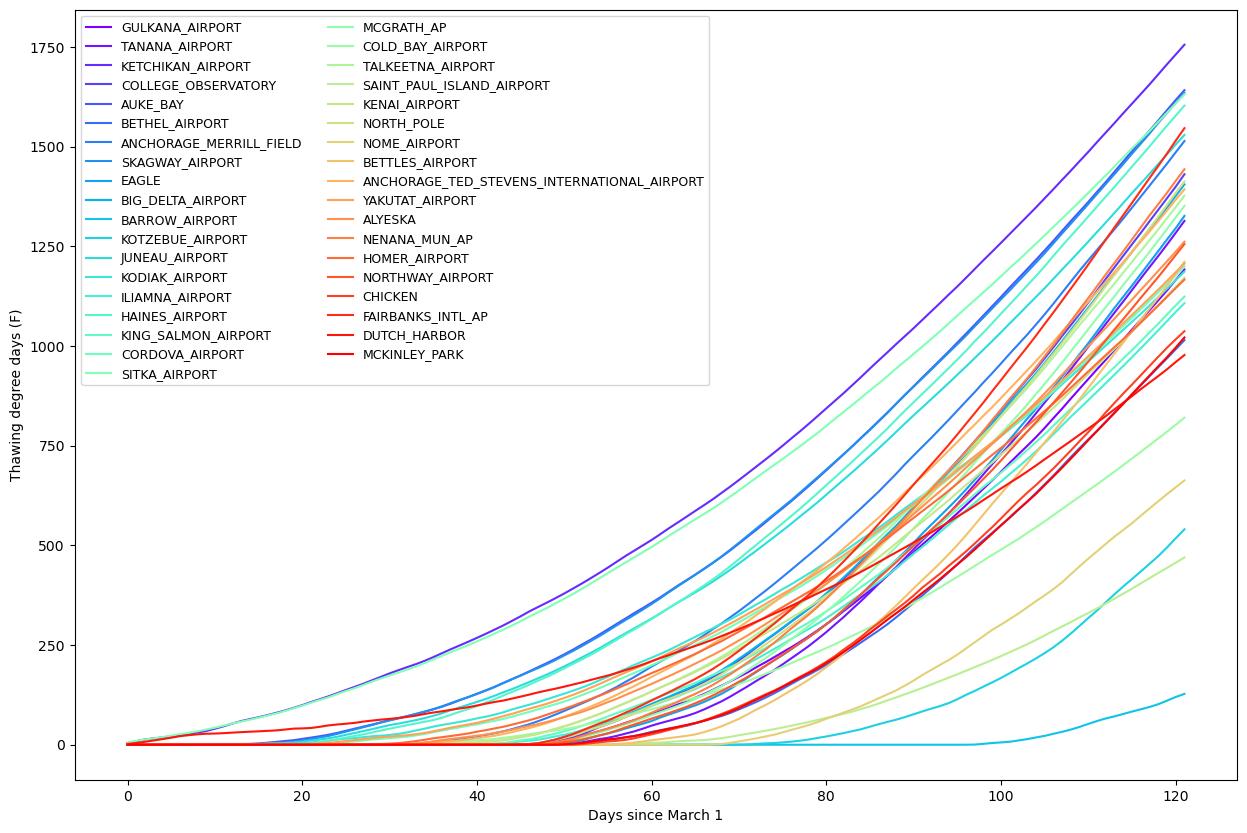

In [ ]:
colors = plt.cm.rainbow(np.linspace(0, 1, len(alltdd)))

fig, ax = plt.subplots(figsize=(15, 10))
pd.concat(alltdd, axis=1).plot(ax=ax, legend=False, color=colors)
ax.legend(fontsize=9, ncol=2, loc='upper left')
ax.set_xlabel('Days since March 1')
ax.set_ylabel('Thawing degree days (F)')


In [ ]:
outpath = PROJPATH / "data/weatherstations/ACIS/TDD/"
fn = "all_cumul_clim1991_2020.csv"

with open(outpath / fn, 'w') as dst:
    dst.write(f"# All climatologies for cumulative TDD, 1991-2020\n")
    dst.write(f"# Cumulative thawing degree days starting March 1 from ACIS\n")
    dst.write("#\n")
    pd.concat(alltdd, axis=1).to_csv(dst, float_format='%.2f')